In [1]:
import numpy as np
from math import sqrt
from sklearn import datasets
import sklearn.metrics as metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsRegressor
from evaluacion_funciones import *
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectPercentile

In [2]:
# Carga de datos.
datos = datasets.load_boston()

In [3]:
# Algoritmos de aprendizaje.
k = 10
reg = KNeighborsRegressor(n_neighbors = k)

In [4]:
# Métricas de evaluación.
metricas = {
  'MAE': metrics.mean_absolute_error,
  'RMSE': lambda y, y_pred:
          sqrt(metrics.mean_squared_error(y, y_pred)),
  'MAPE': lambda y, y_pred:
          np.mean(np.abs((y - y_pred) / y)) * 100,
  'R2': metrics.r2_score}

In [18]:
# Preprocesamiento previo de los datos.
# a) Estandarizacion:
est = StandardScaler()
datos_preprocesados = est.fit_transform(datos.data)
# b) Seleccion de atributos:
selatr = SelectPercentile(score_func=f_regression, percentile=10)
datos_preprocesados = selatr.fit_transform(datos_preprocesados, datos.target)

In [20]:
selatr.scores_

array([ 89.48611476,  75.2576423 , 153.95488314,  15.97151242,
       112.59148028, 471.84673988,  83.47745922,  33.57957033,
        85.91427767, 141.76135658, 175.10554288,  63.05422911,
       601.61787111])

In [21]:
print(selatr)

SelectPercentile(score_func=<function f_regression at 0x000002AB054D3158>)


In [22]:
print(datos.data.shape)
print(datos_preprocesados.shape)

(506, 13)
(506, 2)


In [23]:
# Validación y obtención de las predicciones del modelo.
seed = 1
y_pred = cross_val_predict(reg, datos_preprocesados, datos.target,
           cv = KFold(n_splits=10, random_state=seed))

C:\Users\user\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:297: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


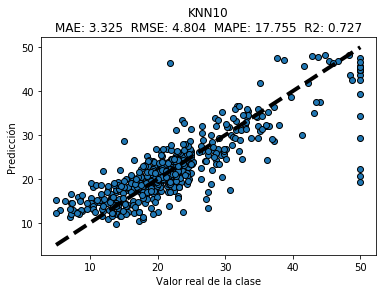

In [24]:
# Evaluación y presentación de resultados.
eval = evaluacion(datos.target, y_pred, metricas)
grafica_real_vs_pred(datos.target, y_pred, eval, "KNN"+str(k))